In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from collections import Counter

# Exploring dataset and its dimensionality

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Protik/ml 7 th semester project/archive/lung_cancer_mortality_data_large_v2.csv")

In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


In [ ]:
df.shape

(3250000, 18)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Protik/ml 7 th semester project/archive/lung_cancer_mortality_data_large_v2.csv")

# Remove 250,000 rows
df_reduced = df.iloc[3200000:]  # Keep rows from 250,001 onward

# Verify the size of the new dataset
print(f"Original dataset size: {len(df)}")
print(f"Reduced dataset size: {len(df_reduced)}")

# Save the reduced dataset if needed
df_reduced.to_csv("/content/drive/MyDrive/Protik/ml_7th_reduced.csv", index=False)


Original dataset size: 3250000
Reduced dataset size: 50000


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/Protik/ml_7th_reduced.csv")

In [ ]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,3200001,65.0,Female,Ireland,2021-06-10,Stage III,2021-06-11,No,Never Smoked,30.8,284,1,0,0,0,Surgery,2022-01-17,1
1,3200002,56.0,Female,Spain,2020-04-03,Stage I,2020-04-06,No,Passive Smoker,19.9,170,1,1,1,0,Chemotherapy,2021-08-15,0
2,3200003,49.0,Female,Czech Republic,2019-02-19,Stage III,2019-02-21,No,Current Smoker,22.1,221,1,1,1,0,Chemotherapy,2020-10-31,0
3,3200004,64.0,Female,Italy,2019-02-08,Stage III,2019-02-21,Yes,Current Smoker,17.5,192,1,0,0,0,Chemotherapy,2019-10-18,0
4,3200005,66.0,Female,Slovakia,2020-09-24,Stage III,2020-09-30,Yes,Current Smoker,37.5,272,1,0,0,0,Combined,2022-07-23,1


In [ ]:
# Check the shape of the DataFrame
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Alternatively, print the full shape
print(f"Shape of the DataFrame: {df.shape}")


Number of rows: 50000
Number of columns: 18
Shape of the DataFrame: (50000, 18)


# Looking out for NULL values

In [ ]:
df.isna().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
beginning_of_treatment_date,0
family_history,0
smoking_status,0
bmi,0


In [ ]:
def datediff(x, y):
    date_x = datetime.strptime(x, "%Y-%m-%d")
    date_y = datetime.strptime(y, "%Y-%m-%d")
    diff = date_y - date_x

    return diff.days

# Calculating the total number of days for tratment despite the outcome

In [ ]:
df["days_of_treatment"] = 0

for i in range(df.shape[0]):
    df.iloc[i, -1] = datediff(df.iloc[i, 4], df.iloc[i, -3])

In [ ]:
df["diagnosis_treatment_start"] = 0

for i in range(df.shape[0]):
    df.iloc[i, -1] = datediff(df.iloc[i, 4], df.iloc[i, 6])

# Ratio of lethal and successful outcome

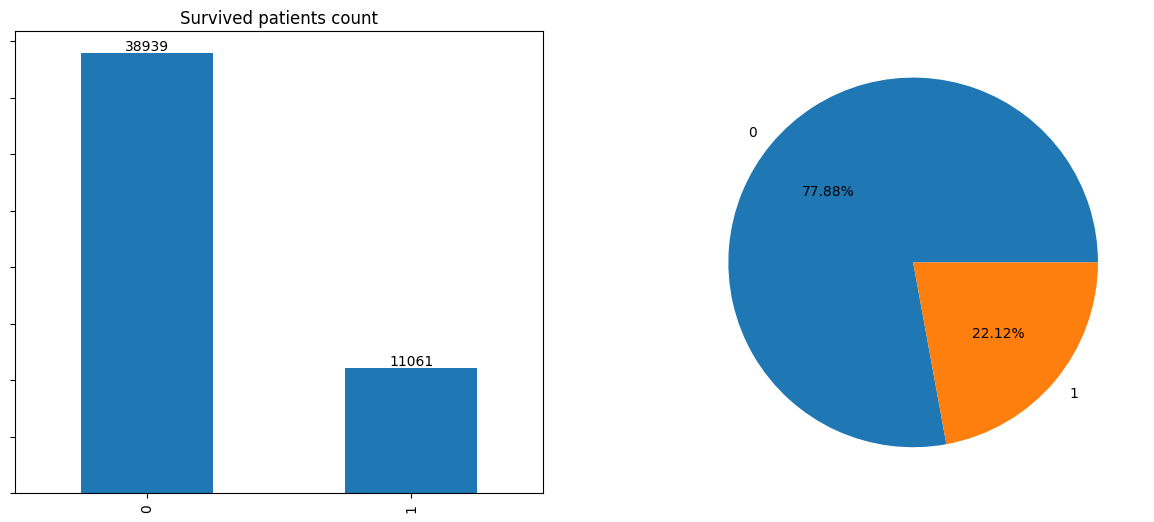

In [ ]:
count = df["survived"].value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
count.plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Survived patients count")
count.plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Average time to start treatment

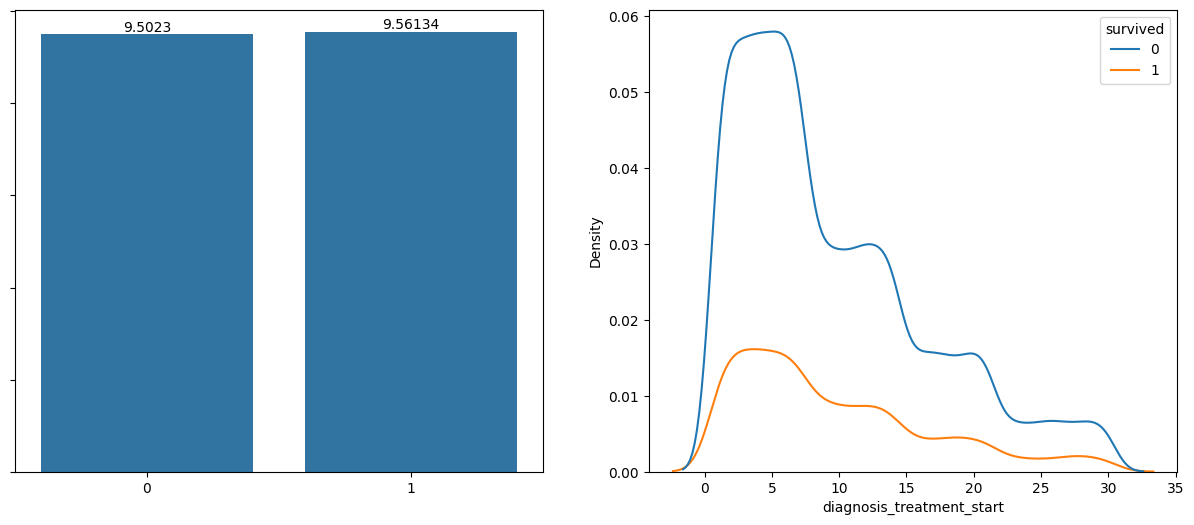

In [ ]:
grouped = df.groupby("survived")
mean = grouped["diagnosis_treatment_start"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="diagnosis_treatment_start", hue="survived", ax=axes[1])

plt.show()

# Top countries with highest average time to start treatment and lowest average time to start treatment

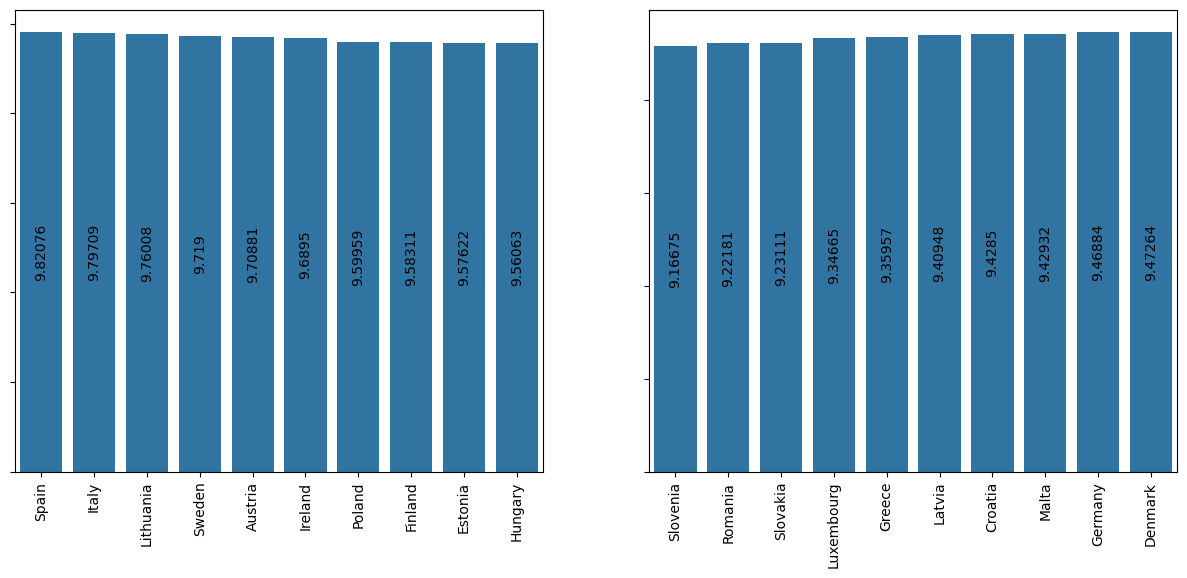

In [ ]:
grouped = df.groupby("country")
mean = pd.DataFrame(grouped["diagnosis_treatment_start"].mean())
mean = mean.sort_values("diagnosis_treatment_start", ascending=False)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container, rotation=90, label_type="center")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")


mean = mean.sort_values("diagnosis_treatment_start", ascending=True)
sns.barplot(x=mean.index[:10], y=mean.iloc[:10, 0], ax=axes[1])
for container in axes[1].containers:
    axes[1].bar_label(container, rotation=90, label_type="center")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")


plt.show()

# Average time of treatment in days and days distribution for each outcome

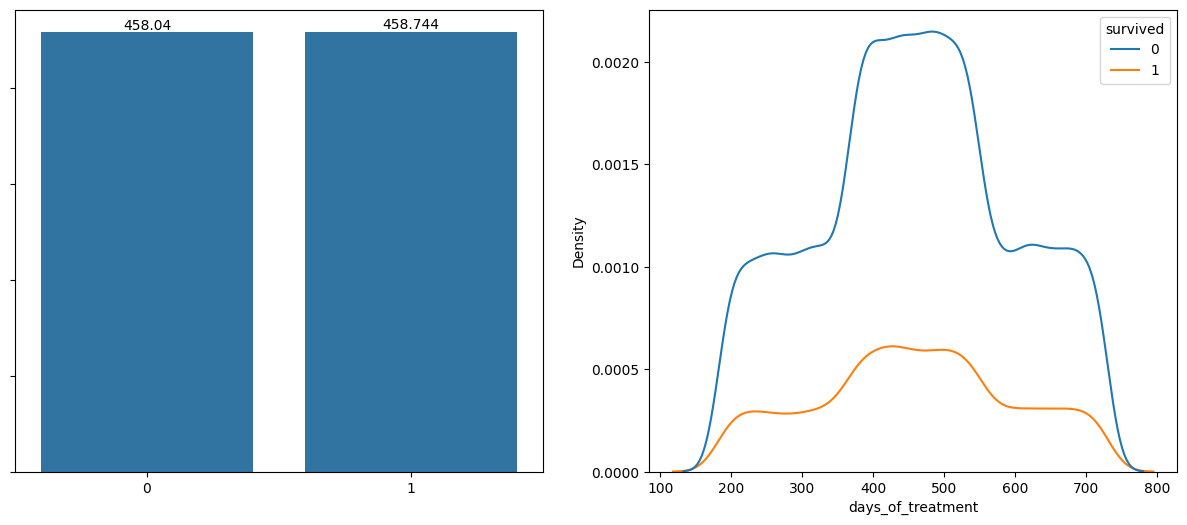

In [ ]:
grouped = df.groupby("survived")
mean = grouped["days_of_treatment"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="days_of_treatment", hue="survived", ax=axes[1])

plt.show()

# Average age for both outcomes and age distribution through density curve

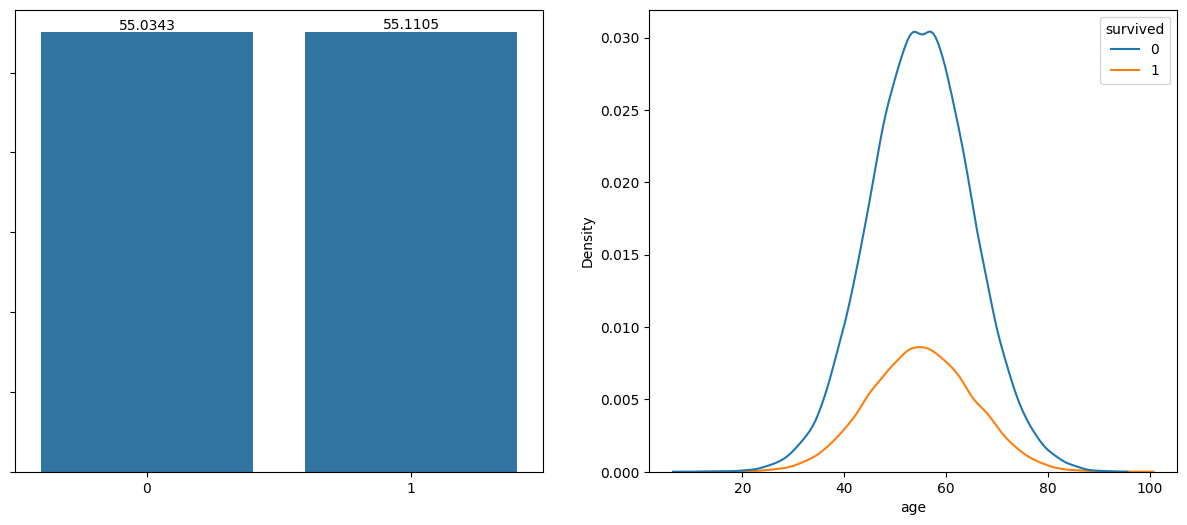

In [ ]:
grouped = df.groupby("survived")
mean = grouped["age"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="age", hue="survived", ax=axes[1])

plt.show()

In [ ]:
survived_df = df[df["survived"] == 1].copy()
dead_df = df[df["survived"] == 0].copy()

# Countires count for each outcome

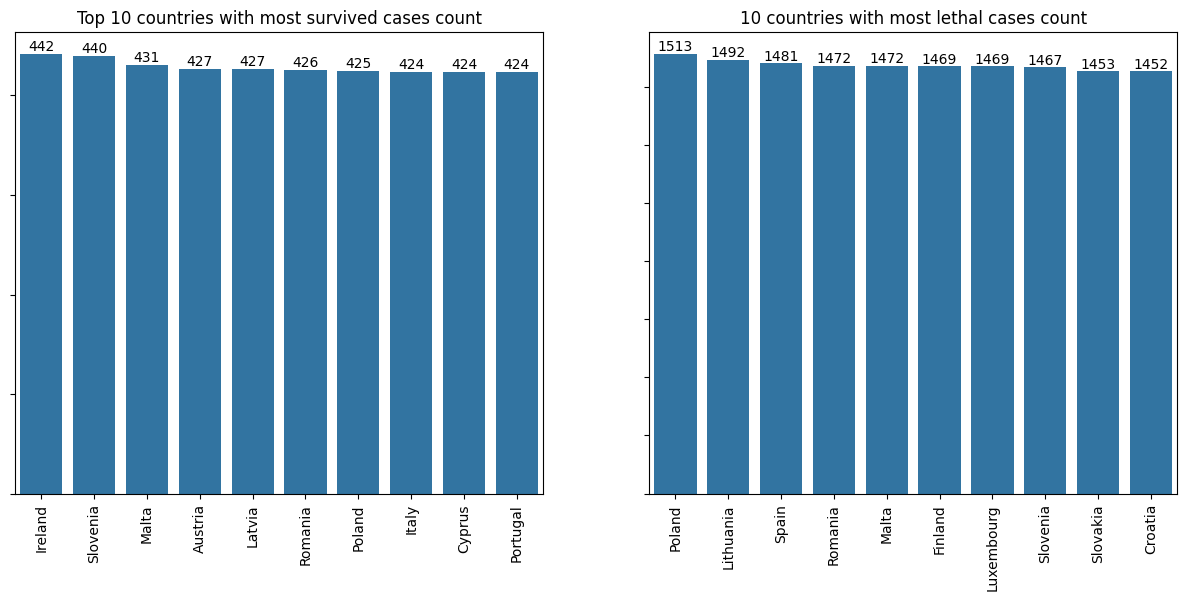

In [ ]:
survived_count = pd.DataFrame(survived_df["country"].value_counts()).sort_values("count", ascending=False)
dead_count = pd.DataFrame(dead_df["country"].value_counts()).sort_values("count", ascending=False)

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.barplot(x=survived_count.index[:10], y=survived_count.iloc[:10, 0], ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Top 10 countries with most survived cases count")
sns.barplot(x=dead_count.index[:10], y=dead_count.iloc[:10, 0], ax=axes[1])

for container in axes[1].containers:
    axes[1].bar_label(container)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("10 countries with most lethal cases count")

plt.show()

# Countries count with highest number of the following smoking statuses

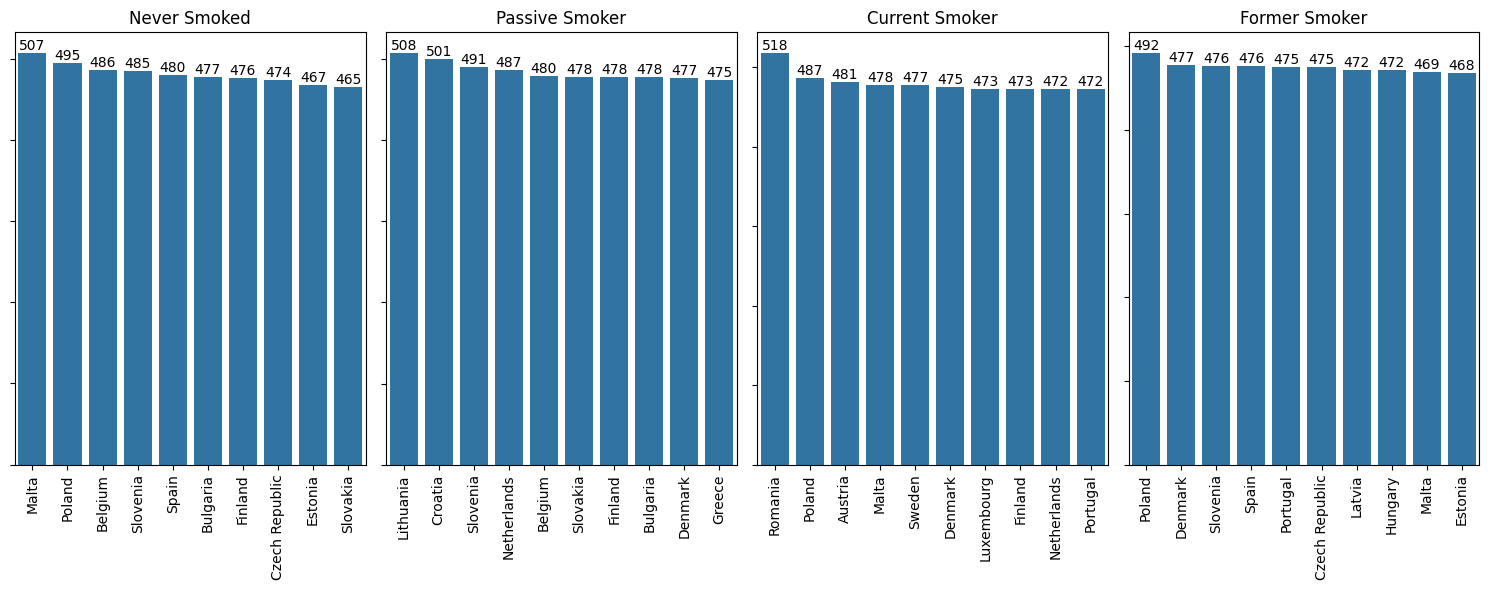

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
for i, j in enumerate(df["smoking_status"].unique()):
    temp_df = df[df["smoking_status"] == j]
    count = pd.DataFrame(temp_df["country"].value_counts()).sort_values("count", ascending=False)
    sns.barplot(x=count.index[:10], y=count.iloc[:10, 0], ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()

# Count of smoking status and its influence on lung cancer occurence

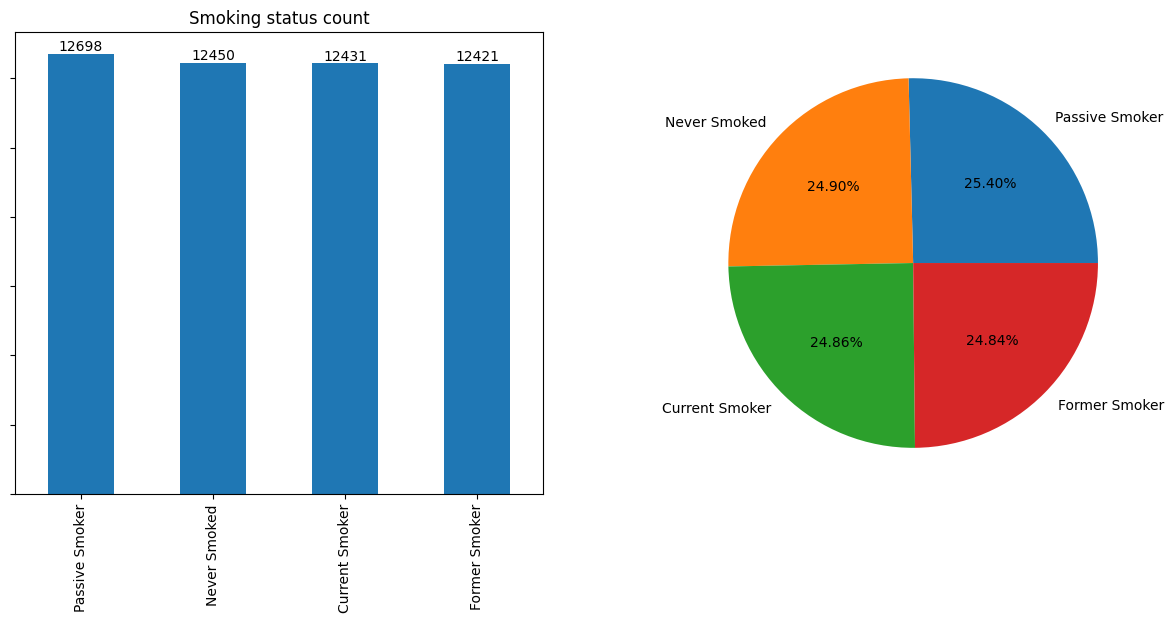

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["smoking_status"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Smoking status count")
df["smoking_status"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of smoking status on cancer survival

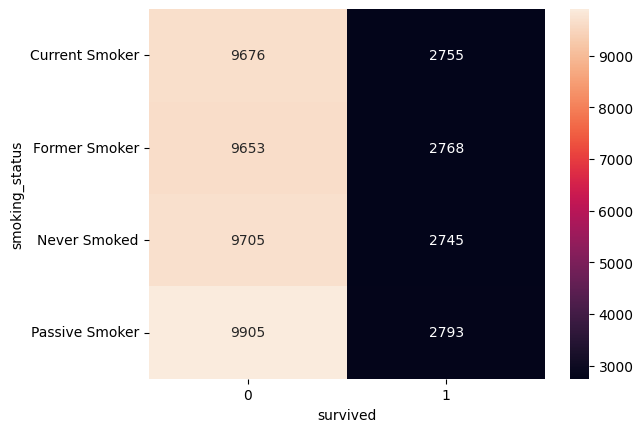

In [ ]:
cross = pd.crosstab(df["smoking_status"], df["survived"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# 10 countries with highest BMI levels and cholesterol levels

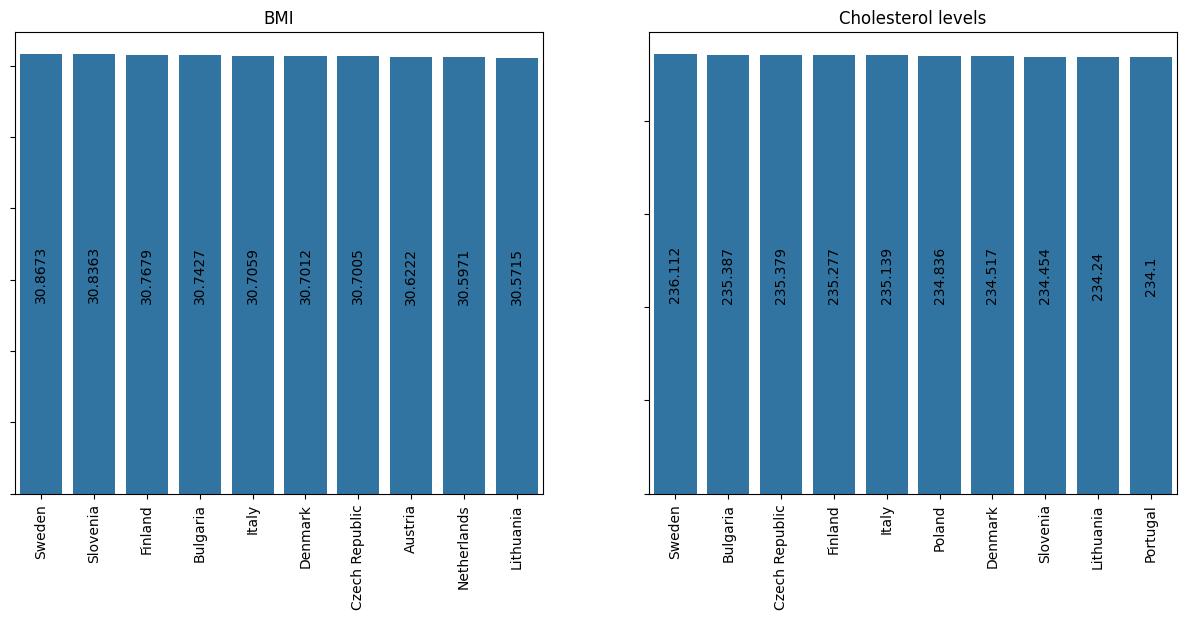

In [ ]:
grouped = df.groupby("country")
bmi = pd.DataFrame(grouped["bmi"].mean()).sort_values("bmi", ascending=False)
chol = pd.DataFrame(grouped["cholesterol_level"].mean()).sort_values("cholesterol_level", ascending=False)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
i = 0
sns.barplot(x=bmi.index[:10], y=bmi.iloc[:10, 0], ax=axes[i])
for container in axes[i].containers:
    axes[i].bar_label(container, rotation=90, label_type="center")
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
axes[i].set_yticklabels(())
axes[i].set_ylabel("")
axes[i].set_xlabel("")
axes[i].set_title("BMI")
i += 1
sns.barplot(x=chol.index[:10], y=chol.iloc[:10, 0], ax=axes[i])
for container in axes[i].containers:
    axes[i].bar_label(container, rotation=90, label_type="center")
axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
axes[i].set_yticklabels(())
axes[i].set_ylabel("")
axes[i].set_xlabel("")
axes[i].set_title("Cholesterol levels")
plt.show()

# Data distribution of BMI and cholesterol levels for cases with lethal and non-lethal outcomes

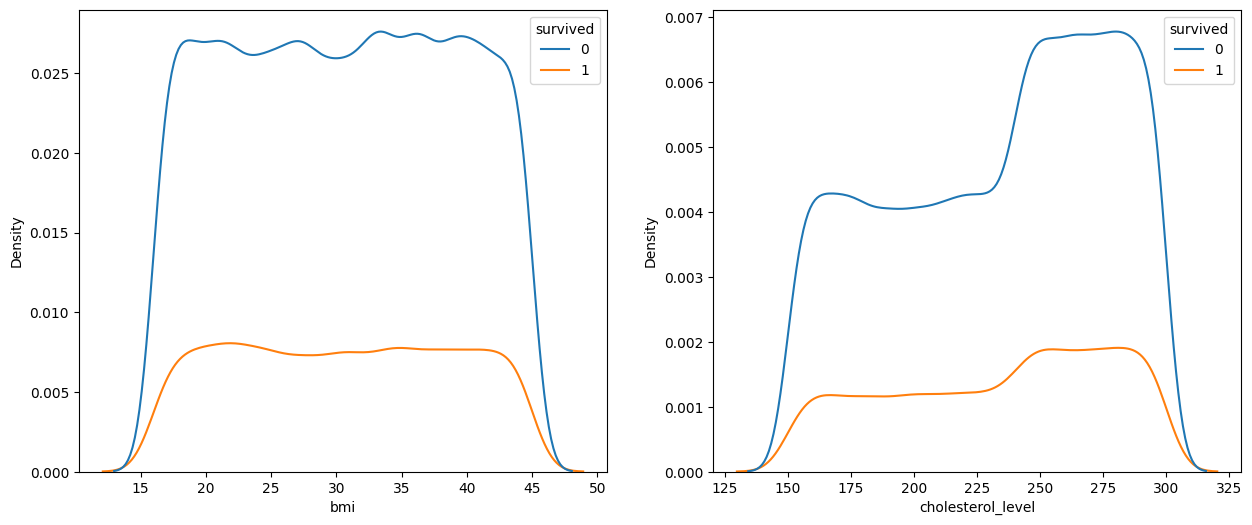

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.kdeplot(df, x="bmi", hue="survived", ax=axes[0])
sns.kdeplot(df, x="cholesterol_level", hue="survived", ax=axes[1])
plt.show()

# Count of gender with lung cancer cases

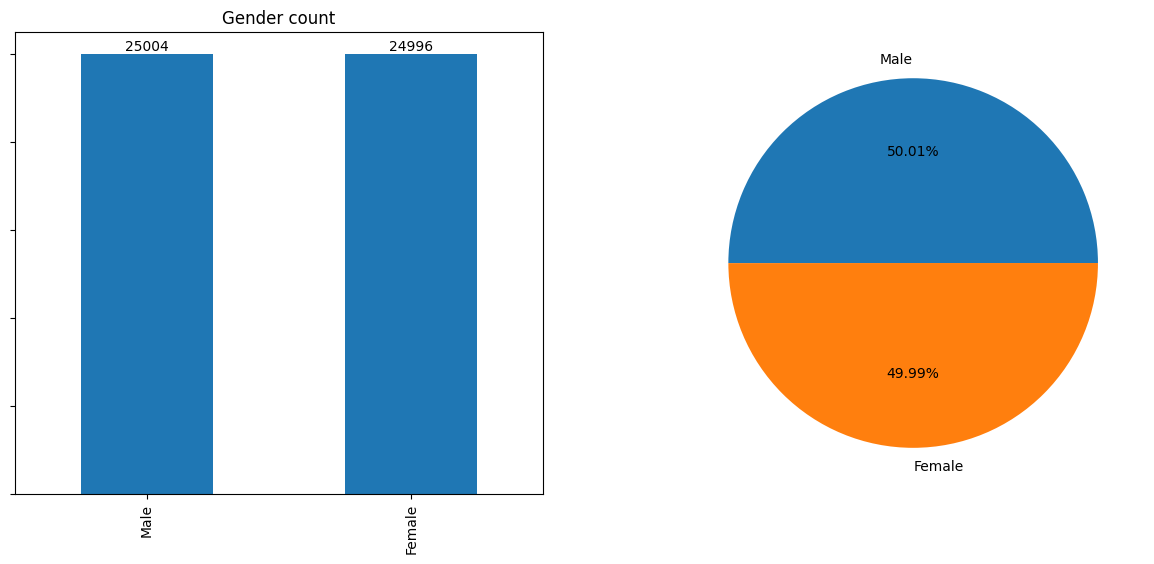

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["gender"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Gender count")
df["gender"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of gender on lung cancer

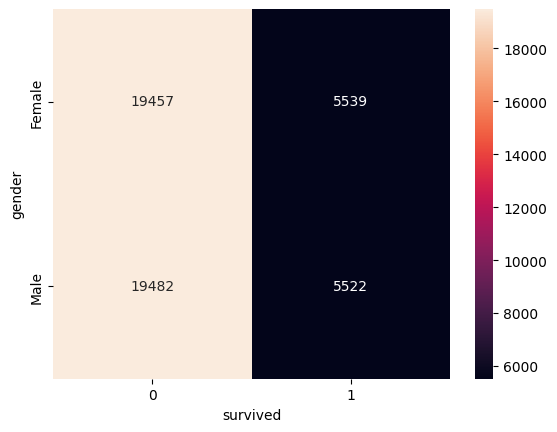

In [ ]:
cross = pd.crosstab(df["gender"], df["survived"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Average age in both genders to have lung cancer

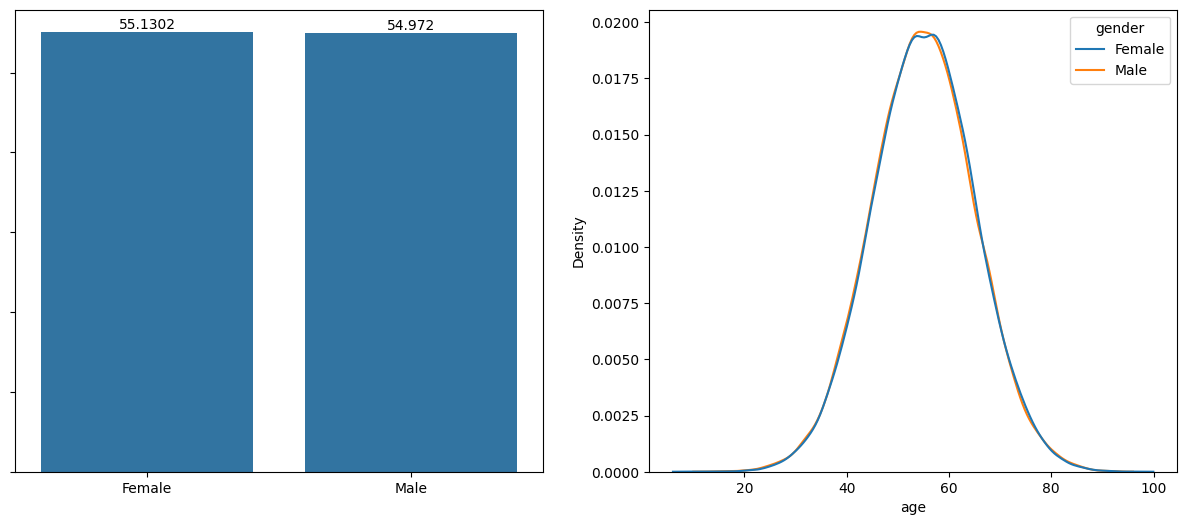

In [ ]:
grouped = df.groupby("gender")
mean = grouped["age"].mean()
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.barplot(x=mean.index, y=mean, ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")

sns.kdeplot(df, x="age", hue="gender", ax=axes[1])

plt.show()

# Which gender has tendencies for various smoking statuses

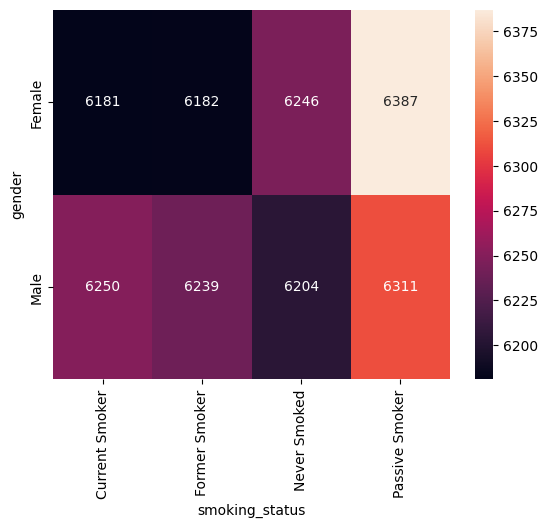

In [ ]:
cross = pd.crosstab(df["gender"], df["smoking_status"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Influence of other diagnoses on the outcome of treatment

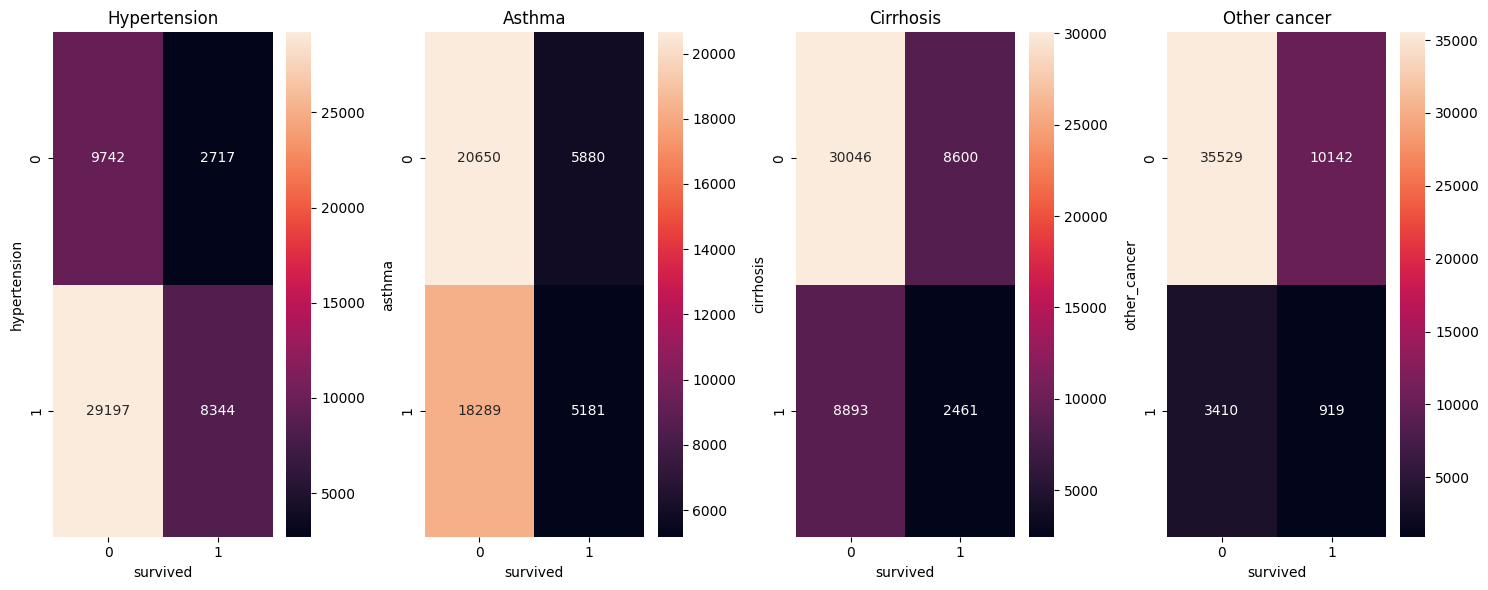

In [ ]:
diseases = ["hypertension", "asthma", "cirrhosis", "other_cancer"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
for i, j in enumerate(diseases):
    cross = pd.crosstab(df[j], df["survived"])
    sns.heatmap(cross, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(j.replace('_', ' ').capitalize())
plt.tight_layout()
plt.show()

# Treatment approaches tendencies

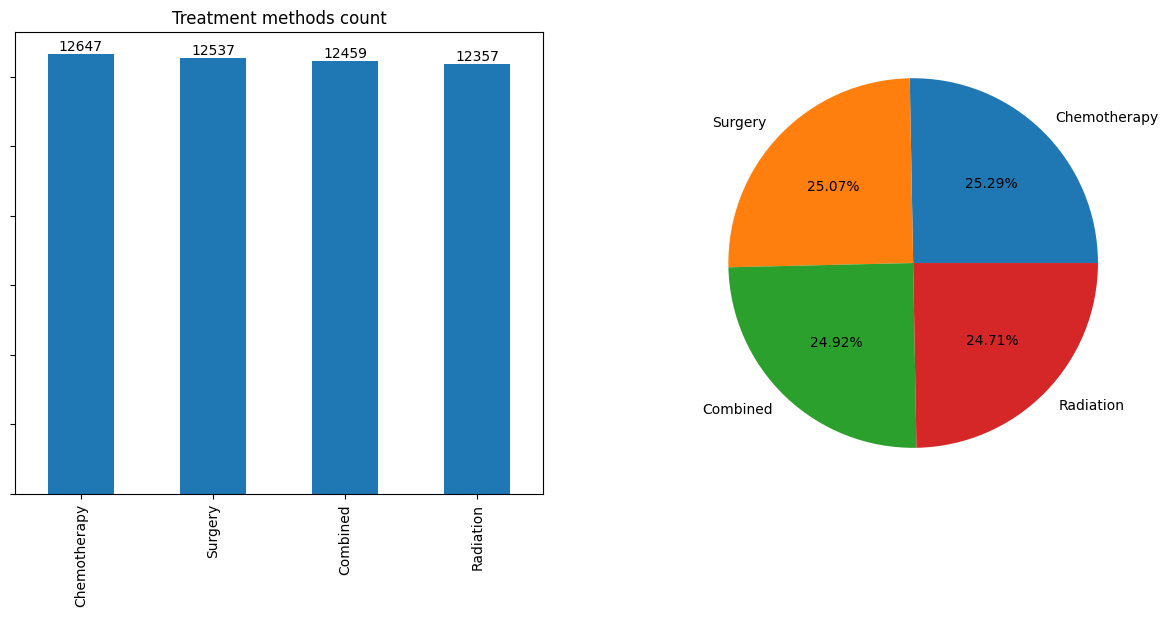

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["treatment_type"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("Treatment methods count")
df["treatment_type"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of treatment type on the outcome

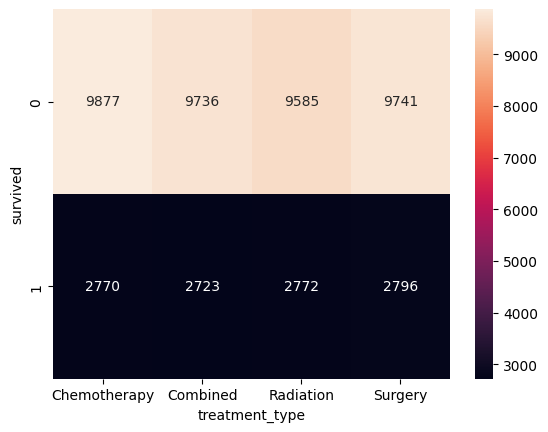

In [ ]:
cross = pd.crosstab(df["survived"], df["treatment_type"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Cases of lung cancer in family history influence on lung cancer occurence

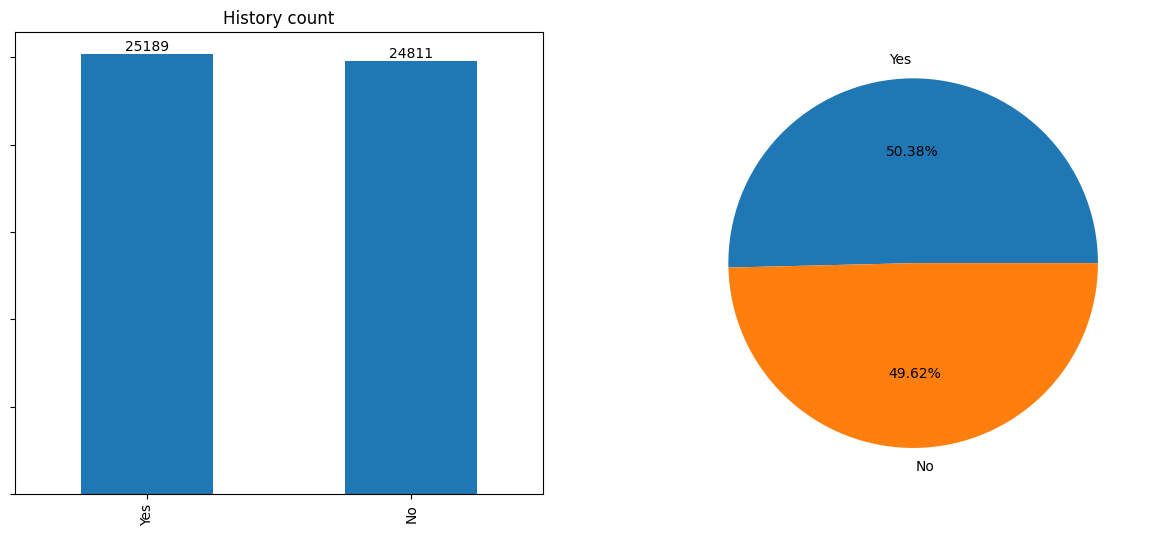

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
df["family_history"].value_counts().plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title("History count")
df["family_history"].value_counts().plot(kind="pie", ax=axes[1], autopct="%0.2f%%")
axes[1].set_ylabel("")
plt.show()

# Influence of family history on survival

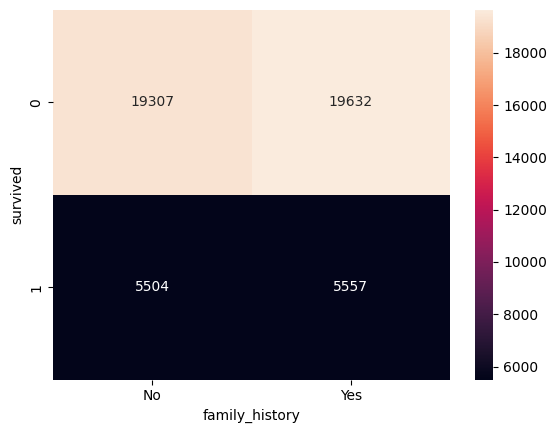

In [ ]:
cross = pd.crosstab(df["survived"], df["family_history"])
sns.heatmap(cross, annot=True, fmt='d')
plt.show()

# Encoding categorical variables

In [ ]:
categoricals = ["gender", "country", "cancer_stage", "family_history", "smoking_status", "treatment_type"]

le = LabelEncoder()
for i in categoricals:
    df[i] = le.fit_transform(df[i].values)

# Selecting features for training

In [ ]:
x = df.drop(["id", "diagnosis_date", "end_treatment_date", "survived", "beginning_of_treatment_date"], axis=1).values
y = df.loc[:, "survived"].values

# Scaling values

In [ ]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Applying SMOTE to deal with class imbalance

In [ ]:
smote = SMOTE()
print("Before: ", Counter(y_train))
x_train, y_train = smote.fit_resample(x_train, y_train)
print("After: ", Counter(y_train))

Before:  Counter({0: 31193, 1: 8807})
After:  Counter({1: 31193, 0: 31193})


In [ ]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    proba = model.predict_proba(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)

    return score*100, report, cm, pred, proba

# Classic ML models

In [ ]:
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
lgr = LogisticRegression()

models = [rfc, etc, gbc,
         abc, xgb, lgb, lgr]

names = ["Random Forest", "Extra Trees", "Gradient Boosting",
        "Ada Boost", "XGB", "LGB", "Logistic Regression"]

# ANN model for classification

In [ ]:
in_features = tf.keras.Input(shape=(x.shape[1], ))
layer1 = tf.keras.layers.Dense(32, activation="relu")(in_features)
droput = tf.keras.layers.Dropout(0.2)(layer1)
layer = tf.keras.layers.Dense(2, activation="softmax")(droput)
model = tf.keras.Model(inputs=in_features, outputs=layer)
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578 (2.26 KB)

 Trainable params: 578 (2.26 KB)

 Non-trainable params: 0 (0.00 B)

# Training ML models and saving their evaluation performance

In [ ]:
scores, reports, cms, preds, probas = [], dict(), dict(), dict(), dict()

for i, j in zip(models, names):
    score, report, cm, pred, proba = training(i)
    scores += [score]
    reports[j] = report
    cms[j] = cm
    preds[j] = pred
    probas[j] = proba

[LightGBM] [Info] Number of positive: 31193, number of negative: 31193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2362
[LightGBM] [Info] Number of data points in the train set: 62386, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
y_cat = tf.keras.utils.to_categorical(y_train)

# Training ANN model

In [ ]:
history = model.fit(x_train, y_cat, batch_size=8, epochs=20, validation_split=0.1)

Epoch 1/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5435 - loss: 0.6923 - val_accuracy: 3.2056e-04 - val_loss: 0.8033
Epoch 2/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5523 - loss: 0.6863 - val_accuracy: 0.0013 - val_loss: 0.8801
Epoch 3/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5538 - loss: 0.6844 - val_accuracy: 0.0024 - val_loss: 0.8448
Epoch 4/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.5569 - loss: 0.6826 - val_accuracy: 0.1669 - val_loss: 0.7659
Epoch 5/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.5528 - loss: 0.6825 - val_accuracy: 0.0063 - val_loss: 0.8306
Epoch 6/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5537 - loss: 0.6802 - val_accuracy: 0.1542 - val_loss: 0.7886
Epoch 7/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.5550 - loss: 0.6790 - val_accuracy: 0.2255 - val_loss: 0.7733
Epoch 8/20
7019/7019 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5599 - los

# Performance log

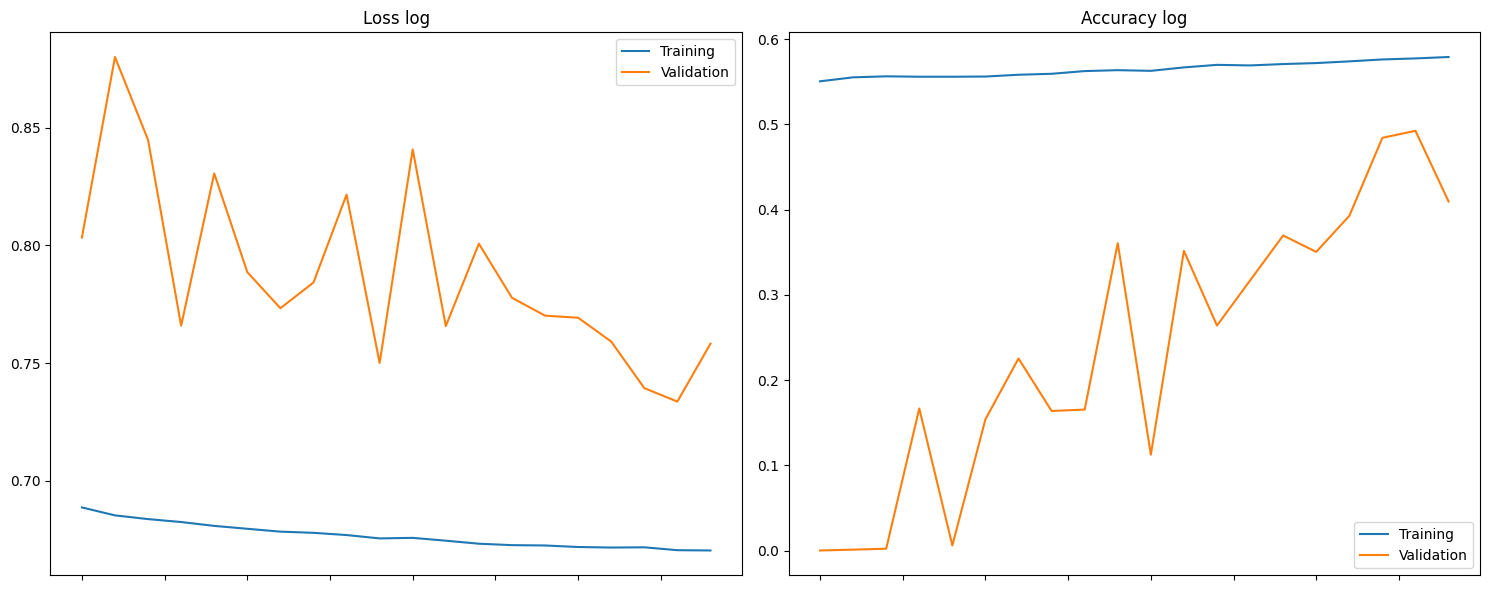

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0
axes[index].plot(history.history["loss"], label="Training")
axes[index].plot(history.history["val_loss"], label="Validation")
axes[index].legend()
axes[index].set_xlabel("")
axes[index].set_ylabel("")
axes[index].set_xticklabels(())
axes[index].set_title("Loss log")
index += 1

axes[index].plot(history.history["accuracy"], label="Training")
axes[index].plot(history.history["val_accuracy"], label="Validation")
axes[index].legend()
axes[index].set_xlabel("")
axes[index].set_ylabel("")
axes[index].set_xticklabels(())
axes[index].set_title("Accuracy log")

plt.tight_layout()
plt.show()

In [ ]:
proba = model.predict(x_test)
pred = [np.argmax(i) for i in proba]
score = accuracy_score(pred, y_test)
report = classification_report(pred, y_test)
cm = confusion_matrix(pred, y_test)

scores += [score*100]
reports["ANN"] = report
cms["ANN"] = cm
preds["ANN"] = pred
probas["ANN"] = proba

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
names += ["ANN"]

# Models evaluation score rated

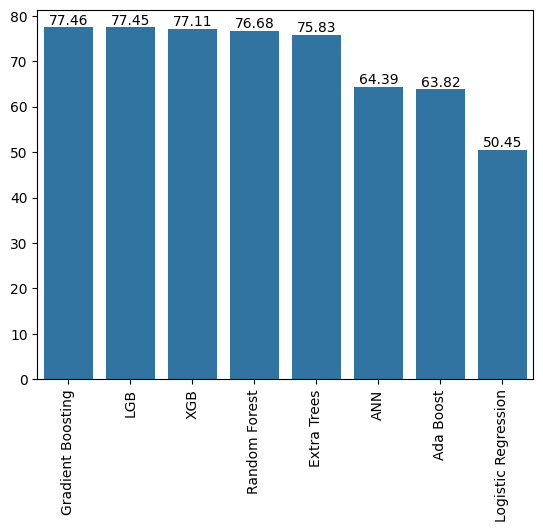

In [ ]:
dd = pd.DataFrame({"scores": scores}, index=names).sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.get_yticklabels(())
axes.set_xlabel("")
axes.set_ylabel("")

plt.show()

# Different version for model to predict survival or lethal outcome probability

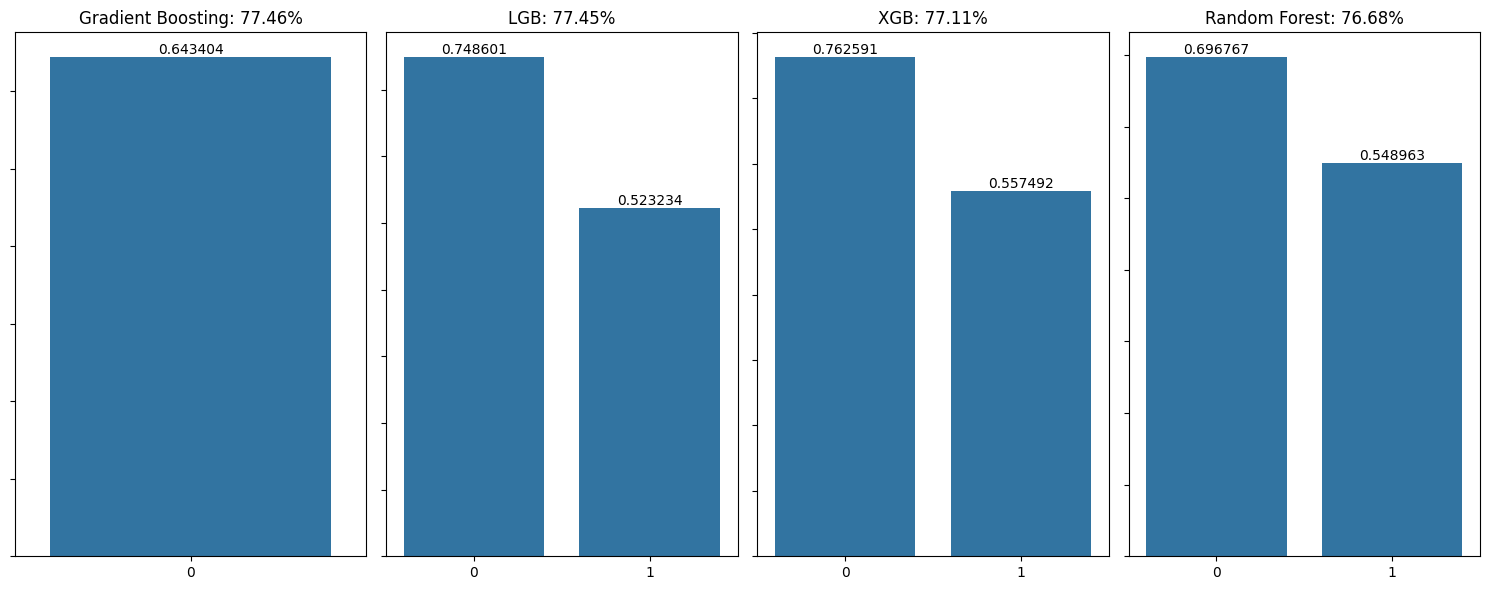

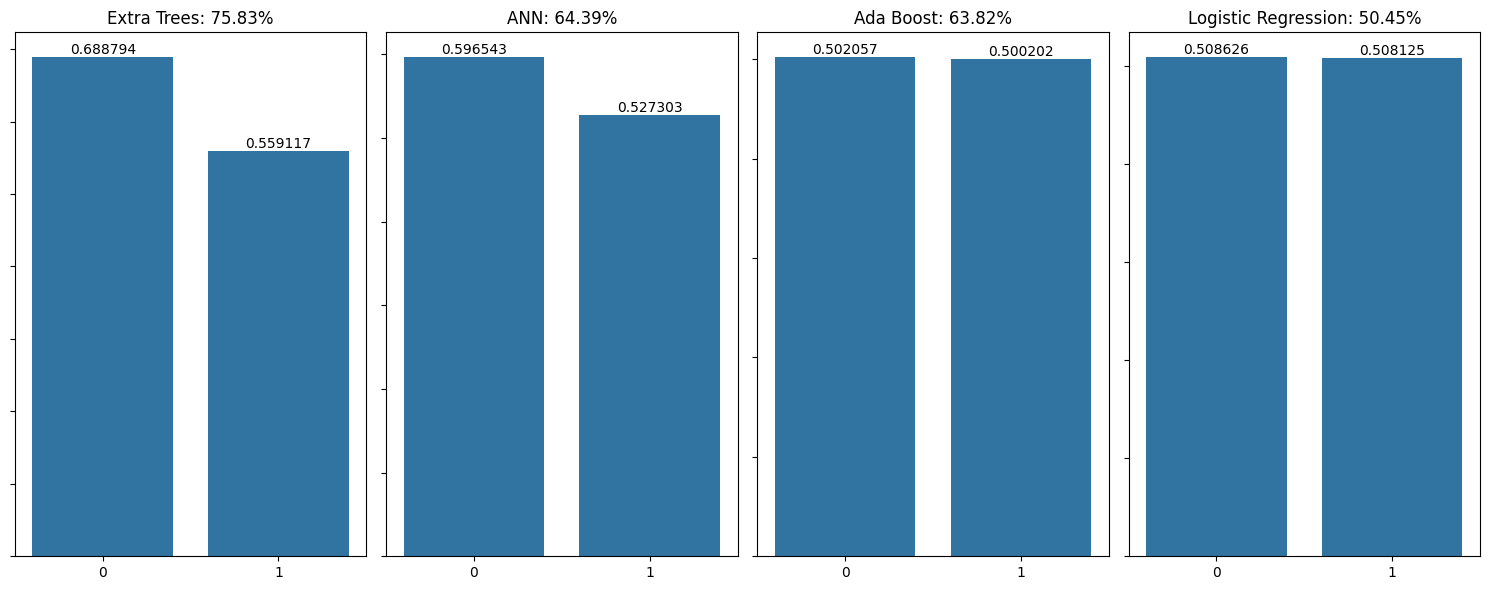

In [ ]:
index = 0
for i in range(2):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
    for j in range(4):
        dt = {"labels": [], "probabilities": []}
        for k, l in zip(preds[dd.index[index]], probas[dd.index[index]]):
            dt["labels"] += [k]
            dt["probabilities"] += [l[k]]
        dt = pd.DataFrame(dt)
        grouped = dt.groupby("labels")
        mean = grouped["probabilities"].mean()
        sns.barplot(x=mean.index, y=mean, ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_yticklabels(())
        axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    plt.tight_layout()
    plt.show()

# Confusion matrices

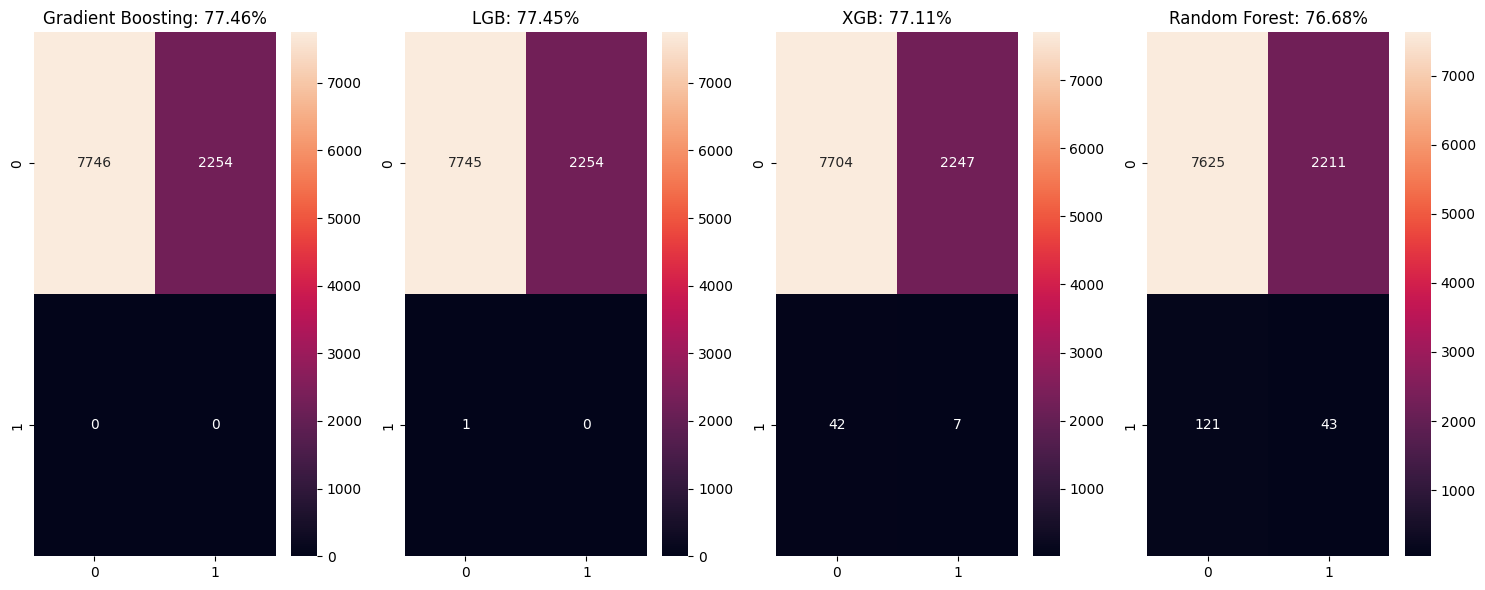

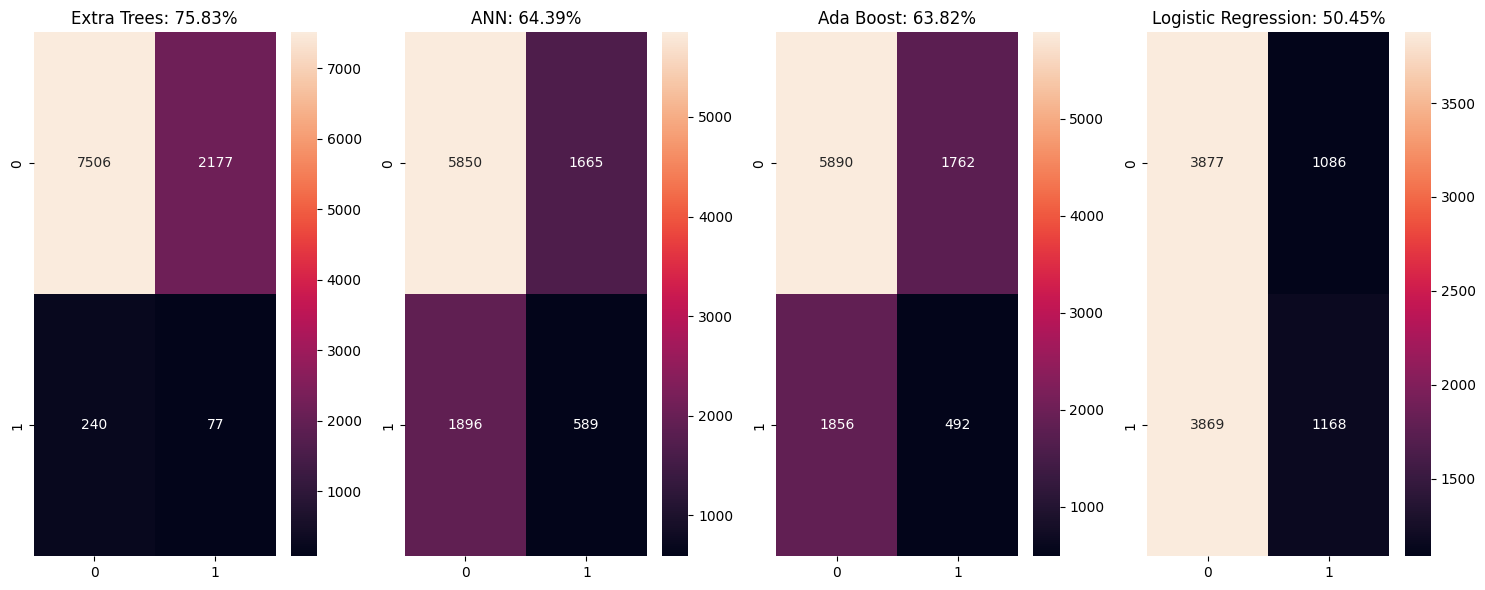

In [ ]:
index = 0
for i in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(4):
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    plt.tight_layout()
    plt.show()

# Classification reports

In [ ]:
for i in dd.index:
    print(i)
    print(reports[i])
    print("\n\n")

Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.77     10000
   macro avg       0.50      0.39      0.44     10000
weighted avg       1.00      0.77      0.87     10000




LGB
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      9999
           1       0.00      0.00      0.00         1

    accuracy                           0.77     10000
   macro avg       0.50      0.39      0.44     10000
weighted avg       1.00      0.77      0.87     10000




XGB
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      9951
           1       0.00      0.14      0.01        49

    accuracy                           0.77     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.99      0.77      0.8

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Output cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")


Cross-validation scores: [0.76875 0.84375 0.80625 0.825   0.81875]
Mean CV score: 0.8125
